In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score


Perceptron

In [ ]:
class Perceptron(object):
  def __init__(self, learning_rate=0.01, n_iter=100, random_state=1):
    self.learning_rate = learning_rate
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
      rand = np.random.RandomState(self.random_state)
      self.weights = rand.normal(loc=0.0, scale=0.01, size=1 +  X.shape[1])
      self.errors_ = []

      for _ in range(self.n_iter):
        errors = 0
        for x, target in zip(X, y):
          update = self.learning_rate * (target - self.predict(x))
          self.weights[1:] += update * x
          self.weights[0] += update
          errors += int(update != 0.0)
          self.errors_.append(errors)
        return self

  def net_input(self, X):
      z = np.dot(X, self.weights[1:]) + self.weights[0]
      return z

  def predict(self, X):
      return np.where(self.net_input(X) >= 0, 1, -1)

  def train_test_split(self, X, y, test_size=0.2, random_state=None):
      if random_state is not None:
          np.random.seed(random_state)
      indices = np.random.permutation(X.shape[0])
      test_size = int(len(indices) * test_size)
      test_indices = indices[:test_size]
      train_indices = indices[test_size:]
      X_train, X_test = X[train_indices], X[test_indices]
      y_train, y_test = y[train_indices], y[test_indices]
      return X_train, X_test, y_train, y_test

  def tune_epochs(self, X_train, y_train, X_val, y_val, epochs_to_try):
      accuracies = []
      for n_iter in epochs_to_try:
          self.n_iter = n_iter
          self.fit(X_train, y_train)
          y_pred = self.predict(X_val)
          accuracy = accuracy_score(y_val, y_pred)
          accuracies.append(accuracy)
      return accuracies

Reading dataset

In [ ]:
df=pd.read_csv("test.csv")

df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


Preprocessing

In [ ]:
X=np.array(df.iloc[:, :-2])

print(X)

[[ 0.25717778 -0.02328523 -0.01465376 ... -0.72000927  0.27680104
  -0.0579783 ]
 [ 0.28602671 -0.01316336 -0.11908252 ... -0.69809082  0.28134292
  -0.08389801]
 [ 0.27548482 -0.02605042 -0.11815167 ... -0.70277146  0.28008303
  -0.0793462 ]
 ...
 [ 0.34996609  0.03007744 -0.11578796 ... -0.65535684  0.27447878
   0.18118355]
 [ 0.23759383  0.01846687 -0.09649893 ... -0.65971859  0.26478161
   0.18756291]
 [ 0.15362719 -0.01843651 -0.13701846 ... -0.66008023  0.26393619
   0.1881034 ]]


In [ ]:
print(df['Activity'].unique())

['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

y = Le.fit_transform(df['Activity'])
print(y)

[2 2 2 ... 5 5 5]


Exploratory Analysis

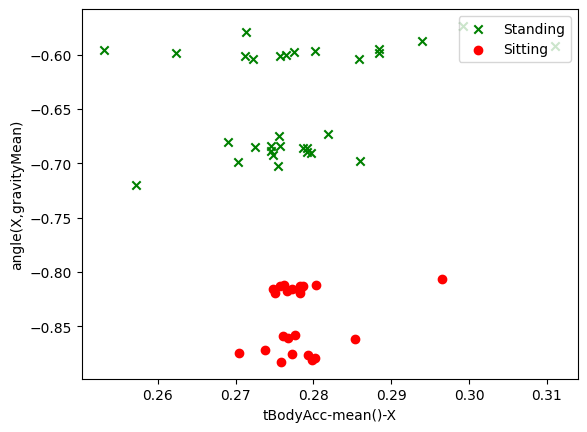

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

d=np.array(df[["tBodyAcc-mean()-X","angle(X,gravityMean)"]])

plt.scatter(d[:31, 0], d[:31, 1],
            color='green', marker='x', label='Standing')
plt.scatter(d[31:55, 0], d[31:55, 1],
            color='red', marker='o', label='Sitting')
plt.xlabel('tBodyAcc-mean()-X')
plt.ylabel('angle(X,gravityMean)')
plt.legend(loc='upper right')
plt.show()

Train-Test Split

In [ ]:
per = Perceptron(learning_rate=0.1, n_iter=100, random_state=1)
X_train, X_test, y_train, y_test = per.train_test_split(X, y, test_size=0.2, random_state=42)


Epoch Tuning

In [ ]:
#Splitting the training set further into training and validation sets
X_train_partial, X_val, y_train_partial, y_val = per.train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Define the epochs to try
epochs_to_try = [10, 50, 100, 200, 500]

#Tune the epochs
accuracies = per.tune_epochs(X_train_partial, y_train_partial, X_val, y_val, epochs_to_try)

#Print the results
for i, n_iter in enumerate(epochs_to_try):
    print(f"Epochs: {n_iter}, Accuracy: {accuracies[i]}")

Epochs: 10, Accuracy: 0.19745222929936307
Epochs: 50, Accuracy: 0.19745222929936307
Epochs: 100, Accuracy: 0.19745222929936307
Epochs: 200, Accuracy: 0.19745222929936307
Epochs: 500, Accuracy: 0.19745222929936307


Final model

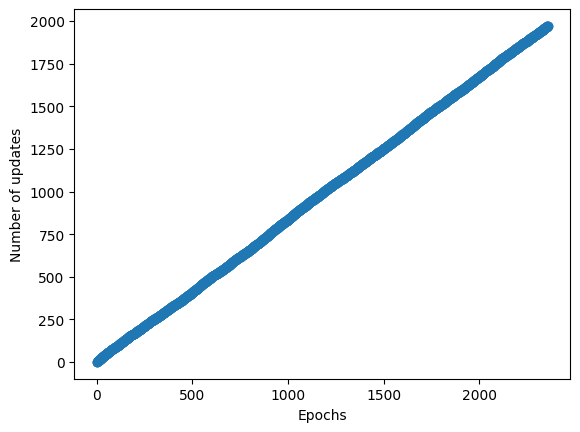

In [ ]:
per.fit(X_train, y_train)
plt.plot(range(1, len(per.errors_) + 1), per.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [ ]:
y_pred = per.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.17487266553480477
